## Projeto MOKA - Sindrome Rara MPSII





Foram selecionados os atributos para compor essa análise , a partir da amostra dos atendimentos via hospital. Os detalhes dessa análise e seleção , estão no documento "Feature Analysis - Hospital.xlsx" ( https://github.com/paulo-moreti/MOKA ). 

Aqui iniciamos a fase de preparação dos dados e seguimos com a exploração de seu potencial para utilização em projeto de Machine Learning. Ao final , apresentamos nossas conclusões.



In [41]:
# Carga das bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from scipy import stats
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
# Carga dos dados originais - Base Hospital
df = pd.read_excel (r'''/home/paulo/Work-Main/Projeto MOKA/Arquivos MPS-II/Machine_Learning_MPS_RD_2.xlsx''' )

In [39]:
# Dimensões da tabela de dados ( linhas , colunas )
print(df.shape)

(11442, 115)


In [42]:
# Uma amostra dos dados carregados
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,PCN (CEP+NASC+SEXO),IDENT,CEP,MUNIC_RES,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,110004,2012,4,7,NaN,1112100490853,76974000200711161,1,76974000,110009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110004,2013,12,3,NaN,1113100408629,76960970199712051,1,76960970,110004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110015,2015,11,7,4.380507e+12,1115100750820,76920000200206211,1,76920000,110015,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110000,2015,12,7,4.287520e+12,1115101117526,76960970199712051,1,76960970,110004,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110009,2016,4,7,4.695284e+12,1116100542205,76974000200711161,1,76974000,110009,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Wrangling
"It's the process of converting data from the initial format to a format that may be better for analysis"

In [43]:
# Remove all of the columns we don’t consider for this analysis after initial lookup 
df = df[['MUNIC_RES', 'UTI_MES_TO', 'UTI_INT_TO', 'PROC_REA', 'VAL_SH', 'VAL_UTI', 
         'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM' , 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3' ]]

In [44]:
# Columns listing / Atributes Data Types 
df.dtypes

MUNIC_RES       int64
UTI_MES_TO      int64
UTI_INT_TO      int64
PROC_REA        int64
VAL_SH        float64
VAL_UTI       float64
DIAG_PRINC     object
DIAG_SECUN     object
IDADE           int64
DIAS_PERM       int64
DIAGSEC1       object
DIAGSEC2       object
DIAGSEC3       object
dtype: object

In [45]:
# Verificando valores zerados

#count rows with value = 0 
len(df[df['DIAG_SECUN'] == 0 ])

7211

In [ ]:
Rows zero value : 

MUNIC_RES  = 0  
UTI_MES_TO =  11412
UTI_INT_TO =  11442
PROC_REA   = 0        
VAL_SH     = 0
VAL_UTI    = 11412 
DIAG_PRINC = 0
DIAG_SECUN = 0    
IDADE      = 3  
DIAS_PERM  = 9302 
DIAGSEC1   = 0
DIAGSEC2   = 0
DIAGSEC3   = 0

Dado que praticamente a totalidade  dos valores dos atributos  :  UTI_MES_TO , UTI_INT_TO , VAL_UTI estão zerados
serão desconsiderados na análise. 
As linhas correspondentes aos valores zerados do atributo DIAS_PERM serão apagadas.

In [46]:
# drop columns 
df=  df.drop(['UTI_MES_TO'], axis=1)
df=  df.drop(['UTI_INT_TO'], axis=1)
df=  df.drop(['VAL_UTI'], axis=1)
# drop rows with zero values in atribute
df.drop(df[df.DIAS_PERM == 0].index, inplace=True)

### Data Missing
How to deal with missing data:

1. Drop data :
  drop the whole row or drop the whole column
2. Replace data : 
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. 

In [47]:
# code from : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
DIAGSEC3,2139,100.0
DIAGSEC2,2135,99.8
DIAGSEC1,2124,99.3
DIAG_SECUN,546,25.5


Baseado nos critérios de tratamento dos dados "missing"  iremos desprezar as features com a maioria de valores nulos ( DIAGSEC1 , 2, 3 ) 
e eliminar linhas com valores nulos ( Diagnostico Sec. ) .Mas a coluna 'Diagnostico Sec." mesmo retirando as ocorrencias nulas , tem muitos zeros. Iremos eliminar essa coluna também. 

In [48]:
df=  df.drop(['DIAGSEC3'], axis=1)
df = df.drop(['DIAGSEC2'], axis=1)
df = df.drop(['DIAGSEC1'], axis=1)
#df= df.drop(df.loc[df['DIAG_SECUN'].isnull()].index)
df = df.drop(['DIAG_SECUN'], axis=1)

### Data Transformation

Method to transform feature code in numerical value : 
LabelCount encoding and it revolves around ranking categories by their counts in the train set. Because it ranks the values, either ascending or descending order can be used. LabelCount has certain advantages in comparison to standard count encoding - it is not sensitive to outliers and should not give the same encoding to different values.
Source : https://wrosinski.github.io/fe_categorical_encoding/

In [49]:
# Converting data types ( categorical feature in numerical values )
df.DIAG_PRINC.value_counts()[:10]

E762    676
E761    555
E763    319
E760    134
E752     91
E889     54
G328     51
J189     21
Z039     17
E730     14
Name: DIAG_PRINC, dtype: int64

In [50]:
def labelcount_encode(X, categorical_features, ascending=False):
    print('LabelCount encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        cat_feature_value_counts = X[cat_feature].value_counts()
        value_counts_list = cat_feature_value_counts.index.tolist()
        if ascending:
            # for ascending ordering
            value_counts_range = list(
                reversed(range(len(cat_feature_value_counts))))
        else:
            # for descending ordering
            value_counts_range = list(range(len(cat_feature_value_counts)))
        labelcount_dict = dict(zip(value_counts_list, value_counts_range))
        X_[cat_feature] = X[cat_feature].map(
            labelcount_dict)
    X_ = X_.add_suffix('_labelcount_encoded')
    if ascending:
        X_ = X_.add_suffix('_ascending')
    else:
        X_ = X_.add_suffix('_descending')
    X_ = X_.astype(np.uint32)
    return X_


In [51]:
df.DIAG_PRINC = labelcount_encode(df, ['DIAG_PRINC'])


LabelCount encoding: ['DIAG_PRINC']


In [52]:
# After data conversion 
df.head()

,MUNIC_RES,PROC_REA,VAL_SH,DIAG_PRINC,IDADE,DIAS_PERM
0,110009,303080078,275.66,90,4,3
1,110004,303140151,554.75,42,15,4
2,110015,301060010,43.65,1,13,1
3,110004,303030046,131.92,1,18,3
4,110009,303140100,152.97,20,8,2


### Removing Outliers

These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values.

In [53]:
# Before remove Outliers ( # observations, # columns/features)
print(df.shape)

(2140, 6)


In [54]:
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [55]:
# See the column data types and non-missing values *** After cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 1 to 11440
Data columns (total 6 columns):
MUNIC_RES     1925 non-null int64
PROC_REA      1925 non-null int64
VAL_SH        1925 non-null float64
DIAG_PRINC    1925 non-null uint32
IDADE         1925 non-null int64
DIAS_PERM     1925 non-null int64
dtypes: float64(1), int64(4), uint32(1)
memory usage: 97.8 KB


### ===> 1 .925 observations (atendimentos ) with 5 columns (features) more 1 target ( DIAG_PRINC )

# Exploratory data analysis (EDA)

It´s an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data

#### Data Normalization

Why normalization?
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.


In [56]:
# replace (origianl value) by (original value)/(maximum value)
df['VAL_SH'] = df['VAL_SH']/df['VAL_SH'].max()
df['PROC_REA '] = df['PROC_REA']/df['PROC_REA'].max()
df['MUNIC_RES'] = df['MUNIC_RES']/df['MUNIC_RES'].max()
df['DIAG_PRINC'] = df['DIAG_PRINC']/df['DIAG_PRINC'].max()
df['IDADE'] = df['IDADE']/df['IDADE'].max()
df['DIAS_PERM'] = df['DIAS_PERM']/df['DIAS_PERM'].max()

In [57]:
# Statistics for each column
df.describe()

,MUNIC_RES,PROC_REA,VAL_SH,DIAG_PRINC,IDADE,DIAS_PERM,PROC_REA
count,1925.000000,1.925000e+03,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.424141,3.029600e+08,0.029129,0.042226,0.318276,0.105368,0.983509
std,0.183261,4.285034e+05,0.044348,0.097741,0.182185,0.103404,0.001391
min,0.211039,3.010600e+08,0.006581,0.000000,0.022727,0.083333,0.977341
25%,0.249899,3.030300e+08,0.022875,0.000000,0.204545,0.083333,0.983736
50%,0.500643,3.030300e+08,0.022875,0.017857,0.295455,0.083333,0.983736
75%,0.501717,3.030300e+08,0.022875,0.035714,0.386364,0.083333,0.983736
max,1.000000,3.080400e+08,1.000000,1.000000,1.000000,1.000000,1.000000


#### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables, X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

     1 : total positive linear correlation,
     0 : no linear correlation, the two variables most likely do not affect each other
    -1 : total negative linear correlation.
    
Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions

In [58]:
df.corr()

,MUNIC_RES,PROC_REA,VAL_SH,DIAG_PRINC,IDADE,DIAS_PERM,PROC_REA
MUNIC_RES,1.000000,-0.178753,0.079887,0.182730,-0.263256,0.156012,-0.178753
PROC_REA,-0.178753,1.000000,0.102448,0.028585,0.112711,0.047180,1.000000
VAL_SH,0.079887,0.102448,1.000000,0.357128,-0.032610,0.546010,0.102448
DIAG_PRINC,0.182730,0.028585,0.357128,1.000000,-0.099835,0.392377,0.028585
IDADE,-0.263256,0.112711,-0.032610,-0.099835,1.000000,-0.073055,0.112711
DIAS_PERM,0.156012,0.047180,0.546010,0.392377,-0.073055,1.000000,0.047180
PROC_REA,-0.178753,1.000000,0.102448,0.028585,0.112711,0.047180,1.000000


#### Idade x Diagnóstico Principal

In [59]:
df[["IDADE","DIAG_PRINC"]].corr()

,IDADE,DIAG_PRINC
IDADE,1.000000,-0.099835
DIAG_PRINC,-0.099835,1.000000


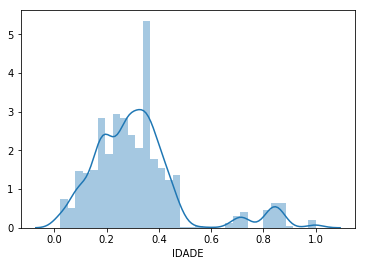

In [60]:
# distribution of observations
sns.distplot(df['IDADE']);

(0, 1.0510419048770769)

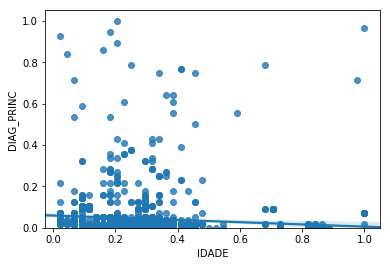

In [61]:

sns.regplot(x="IDADE", y="DIAG_PRINC", data=df)
plt.ylim(0,)

#### Município de Residência X Diagnóstico Principal

In [62]:
df[["MUNIC_RES","DIAG_PRINC"]].corr()

,MUNIC_RES,DIAG_PRINC
MUNIC_RES,1.00000,0.18273
DIAG_PRINC,0.18273,1.00000


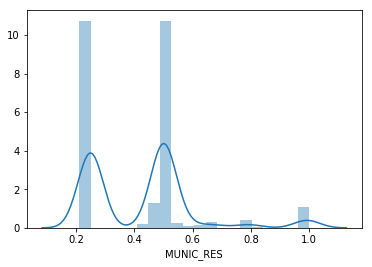

In [63]:
# distribution of observations
sns.distplot(df['MUNIC_RES']);

(0, 1.0500704937604179)

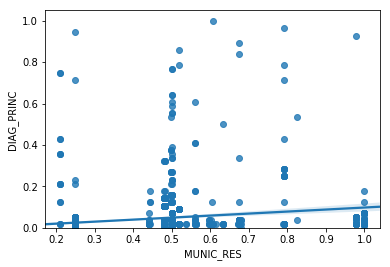

In [64]:
# MUNIC_RES
sns.regplot(x="MUNIC_RES", y="DIAG_PRINC", data=df)
plt.ylim(0,)

#### Procedimento Realizado x Diagnóstico Principal

In [65]:
df[["PROC_REA","DIAG_PRINC"]].corr()

,PROC_REA,DIAG_PRINC
PROC_REA,1.000000,0.028585
DIAG_PRINC,0.028585,1.000000


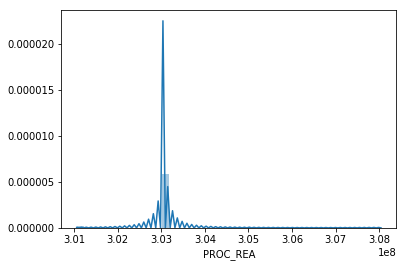

In [66]:
# distribution of observations
sns.distplot(df['PROC_REA']);

(0, 1.0553809399331315)

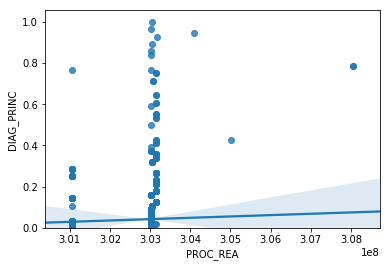

In [67]:
# PROC_REA 
sns.regplot(x="PROC_REA", y="DIAG_PRINC", data=df)
plt.ylim(0,)

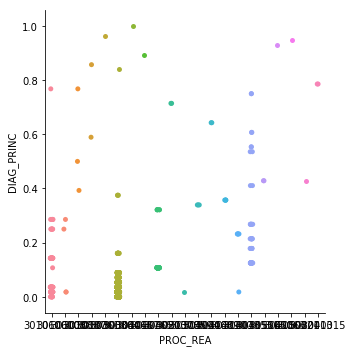

In [68]:
sns.catplot(x="PROC_REA", y="DIAG_PRINC", data=df);

#### Valor do Procedimento x Diagnóstico Principal

In [69]:
df[["VAL_SH","DIAG_PRINC"]].corr()

,VAL_SH,DIAG_PRINC
VAL_SH,1.000000,0.357128
DIAG_PRINC,0.357128,1.000000


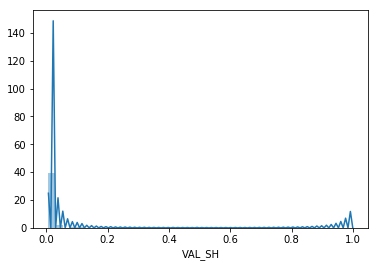

In [70]:
# distribution of observations
sns.distplot(df['VAL_SH']);

(0, 1.6907742091222959)

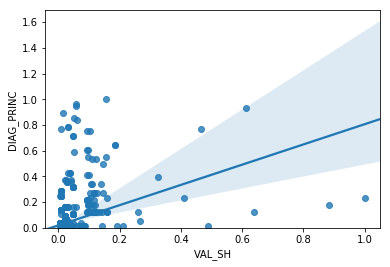

In [71]:
# VAL_SH 
sns.regplot(x="VAL_SH", y="DIAG_PRINC", data=df)
plt.ylim(0,)

#### Dias de Permanência x Diagnóstico Principal

In [72]:
df[["DIAS_PERM","DIAG_PRINC"]].corr()

,DIAS_PERM,DIAG_PRINC
DIAS_PERM,1.000000,0.392377
DIAG_PRINC,0.392377,1.000000


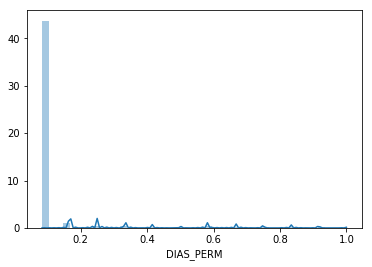

In [73]:
# distribution of observations
sns.distplot(df['DIAS_PERM']);

(0, 1.0500704937604179)

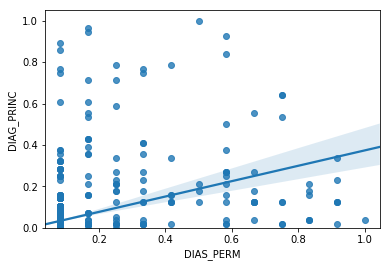

In [74]:
# DIAS_PERM
sns.regplot(x="DIAS_PERM", y="DIAG_PRINC", data=df)
plt.ylim(0,)

#### Conclusões : 

As  features ( colunas ) selecionadas e analisadas se apresentam em um número bem reduzido para compor o modelo como também apresentam baixo índice de correlação com a váriavel target ( diagonóstico principal )  . Esse cenário da qualidade dos dados comprometem diretamente os resultados de uma possível  implementação. 